<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.833922,38.048647,-0.000620,144.881949,144.882349,-0.000400
1,0.0,1.0,42.030953,84.109277,-0.000127,136.140103,136.140274,-0.000172
2,0.0,2.0,50.966046,22.397555,0.003521,83.367121,83.363302,0.003819
3,0.0,3.0,98.036441,67.123453,0.000217,175.160110,175.159834,0.000276
4,0.0,4.0,49.462082,63.017774,0.000173,122.480029,122.479782,0.000247
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.046115,36.460435,0.000310,141.506860,141.506559,0.000300
249996,999.0,246.0,50.862206,99.497544,-0.000229,160.359520,160.359705,-0.000185
249997,999.0,247.0,28.196967,45.880831,-0.000347,84.077451,84.077812,-0.000362
249998,999.0,248.0,93.706355,41.367318,-0.000017,145.073656,145.073678,-0.000022


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.833922  38.048647 -0.000620  144.881949  144.882349 -0.000400
      1.0    42.030953  84.109277 -0.000127  136.140103  136.140274 -0.000172
      2.0    50.966046  22.397555  0.003521   83.367121   83.363302  0.003819
      3.0    98.036441  67.123453  0.000217  175.160110  175.159834  0.000276
      4.0    49.462082  63.017774  0.000173  122.480029  122.479782  0.000247
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.046115  36.460435  0.000310  141.506860  141.506559  0.000300
      246.0  50.862206  99.497544 -0.000229  160.359520  160.359705 -0.000185
      247.0  28.196967  45.880831 -0.000347   84.077451   84.077812 -0.000362
      248.0  93.706355  41.367318 -0.000017  145.073656  145.073678 -0.000022
      249.0  91.877341  28.629132  0.001605  130.508078  130.506492  0.001586

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.833922  38.048647 -0.000620  144.881949  144.882349 -0.000400
      1.0    42.030953  84.109277 -0.000127  136.140103  136.140274 -0.000172
      2.0    50.966046  22.397555  0.003521   83.367121   83.363302  0.003819
      3.0    98.036441  67.123453  0.000217  175.160110  175.159834  0.000276
      4.0    49.462082  63.017774  0.000173  122.480029  122.479782  0.000247
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.046115  36.460435  0.000310  141.506860  141.506559  0.000300
      246.0  50.862206  99.497544 -0.000229  160.359520  160.359705 -0.000185
      247.0  28.196967  45.880831 -0.000347   84.077451   84.077812 -0.000362
      248.0  93.706355  41.367318 -0.000017  145.073656  145.073678 -0.000022
      249.0  91.877341  28.629132  0.001605  130.508078  130.506492  0.001586

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.833922,38.048647,-0.000620,144.881949,144.882349,-0.000400
1,0.0,1.0,42.030953,84.109277,-0.000127,136.140103,136.140274,-0.000172
2,0.0,2.0,50.966046,22.397555,0.003521,83.367121,83.363302,0.003819
3,0.0,3.0,98.036441,67.123453,0.000217,175.160110,175.159834,0.000276
4,0.0,4.0,49.462082,63.017774,0.000173,122.480029,122.479782,0.000247
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.046115,36.460435,0.000310,141.506860,141.506559,0.000300
249996,999.0,246.0,50.862206,99.497544,-0.000229,160.359520,160.359705,-0.000185
249997,999.0,247.0,28.196967,45.880831,-0.000347,84.077451,84.077812,-0.000362
249998,999.0,248.0,93.706355,41.367318,-0.000017,145.073656,145.073678,-0.000022


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.833922  38.048647 -0.000620  144.881949  144.882349 -0.000400
      1.0    42.030953  84.109277 -0.000127  136.140103  136.140274 -0.000172
      2.0    50.966046  22.397555  0.003521   83.367121   83.363302  0.003819
      3.0    98.036441  67.123453  0.000217  175.160110  175.159834  0.000276
      4.0    49.462082  63.017774  0.000173  122.480029  122.479782  0.000247
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.046115  36.460435  0.000310  141.506860  141.506559  0.000300
      246.0  50.862206  99.497544 -0.000229  160.359520  160.359705 -0.000185
      247.0  28.196967  45.880831 -0.000347   84.077451   84.077812 -0.000362
      248.0  93.706355  41.367318 -0.000017  145.073656  145.073678 -0.000022
      249.0  91.877341  28.629132  0.001605  130.508078  130.506492  0.001586

[250000 rows x 6 columns]

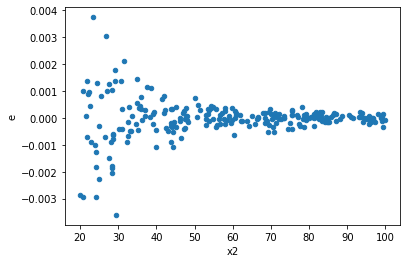

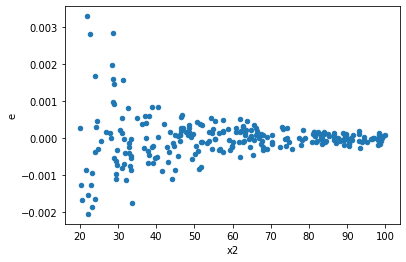

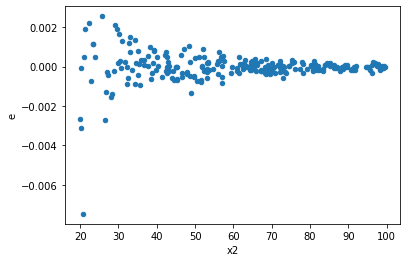

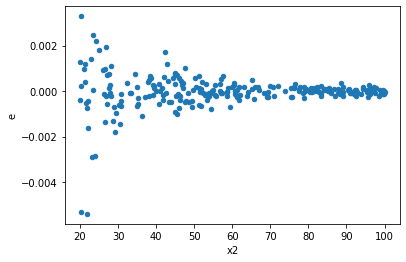

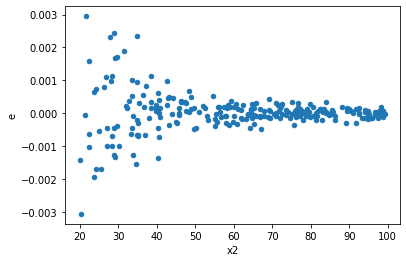

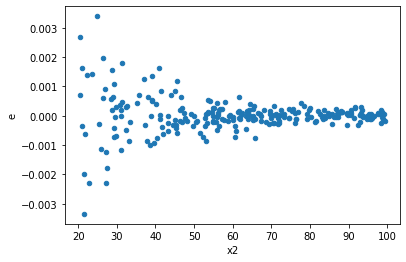

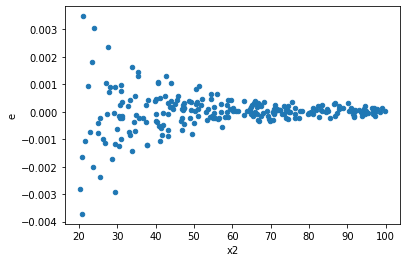

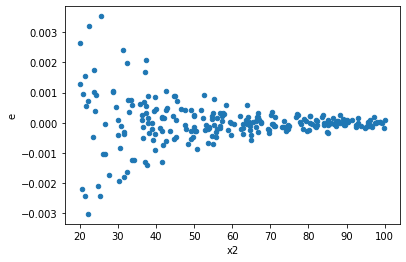

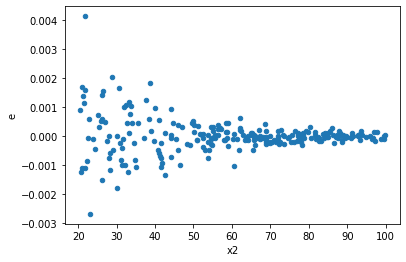

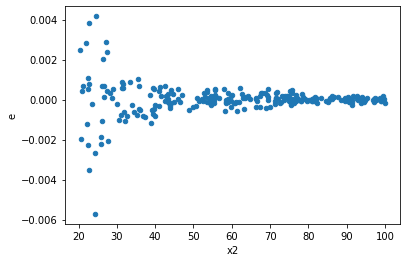

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,142.0,104.0,2.0607958644036736e-05,9.552829566373703e-05,1.4512646932420237e-07,9.1854130445901e-07,6.3292472333703165,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,112.0,134.0,3.4421216080231567e-06,0.00014118606451329297,3.07332286430639e-08,1.0536273471141266e-06,34.283002262826585,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,120.0,126.0,2.7328622859222878e-05,7.5432138192486e-05,2.2773852382685733e-07,5.986677634324286e-07,2.628750522189111,1.3678867993860422e-07,0.99999993160566,6.839433996930211e-08,Reject005=0 : Heteroscedasticity
7.0,107.0,139.0,4.393384593975616e-06,0.0001370068158479494,4.105966910257586e-08,9.856605456687008e-07,24.00556476006442,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,114.0,132.0,3.2658357361302133e-06,0.0001293447465350506,2.8647681895879065e-08,9.79884443447353e-07,34.204667833466424,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,131.0,115.0,3.8644140649998495e-05,5.142183240740078e-05,2.949934400763244e-07,4.471463687600068e-07,1.515784109112106,0.02292635500868112,0.9885368224956594,0.01146317750434056,Reject005=0 : Heteroscedasticity
12.0,109.0,137.0,2.0165700373913e-05,0.00012433054491905077,1.8500642544874312e-07,9.075222256865019e-07,4.905355170693437,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,110.0,136.0,2.8183131709432495e-05,9.411990156908372e-05,2.5621028826756815e-07,6.920580997726744e-07,2.7011331373622953,4.773768291777003e-08,0.9999999761311585,2.3868841458885015e-08,Reject005=0 : Heteroscedasticity
17.0,115.0,131.0,3.4544803995036423e-06,0.0001330361816771994,3.0038959995683847e-08,1.0155433715816748e-06,33.807540997677464,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,108.0,138.0,9.702887877459176e-05,3.0200138505599594e-06,8.984155442091829e-07,2.188415833739101e-08,0.02435861498439925,4.767115629977636e-59,Reject005=0 : Heteroscedasticity
1.0,142.0,104.0,2.0607958644036736e-05,9.552829566373703e-05,1.4512646932420237e-07,9.1854130445901e-07,6.3292472333703165,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,112.0,134.0,3.4421216080231567e-06,0.00014118606451329297,3.07332286430639e-08,1.0536273471141266e-06,34.283002262826585,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,120.0,126.0,2.7328622859222878e-05,7.5432138192486e-05,2.2773852382685733e-07,5.986677634324286e-07,2.628750522189111,1.3678867993860422e-07,Reject005=0 : Heteroscedasticity
4.0,127.0,119.0,0.00013127191440532904,3.376824764001697e-06,1.0336371213018034e-06,2.8376678689089893e-08,0.02745323102691125,9.268901268392595e-64,Reject005=0 : Heteroscedasticity
5.0,135.0,111.0,7.147209123852845e-05,3.167039831282224e-05,5.294228980631736e-07,2.853189037191193e-07,0.538924373620639,0.0006311623520250351,Reject005=0 : Heteroscedasticity
6.0,117.0,129.0,0.00011990591497758352,5.446989968358426e-06,1.0248368801502866e-06,4.222472843688702e-08,0.04120141385885235,2.5465569138917766e-50,Reject005=0 : Heteroscedasticity
7.0,107.0,139.0,4.393384593975616e-06,0.0001370068158479494,4.105966910257586e-08,9.856605456687008e-07,24.00556476006442,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,107.0,139.0,0.00014529485161842814,5.647432739964508e-06,1.35789580951802e-06,4.062901251773027e-08,0.02992056697792696,4.761286595161487e-54,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    788
Reject005=1 : Homoscedasticity      212
Name: Result_test, dtype: int64